In [52]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from datetime import date
import sklearn

In [53]:
weather = pd.read_csv('weatherHistory.csv')
weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'], utc=True)
weather.Summary = weather.Summary.astype('category')
weather['Precip Type'] = weather['Precip Type'].astype('category')
weather['Daily Summary'] = weather['Daily Summary'].astype('category')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  category           
 2   Precip Type               95936 non-null  category           
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Loud Cover                96453 non-null  float64            
 10  Pressure (millibars)      96453 non-null  float64            
 11  Daily Summary  

In [54]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(weather['Humidity'], weather['Apparent Temperature (C)'], test_size=0.33, random_state=54 )

In [55]:
X_train

8679     0.47
95808    0.87
57386    0.72
32537    0.41
40926    0.83
         ... 
93921    0.81
5143     0.90
61199    0.83
82818    0.55
72815    0.85
Name: Humidity, Length: 64623, dtype: float64

In [56]:
y_train

8679     26.111111
95808    16.138889
57386    17.066667
32537    23.888889
40926    13.733333
           ...    
93921    16.227778
5143      0.966667
61199    19.550000
82818    22.266667
72815     1.677778
Name: Apparent Temperature (C), Length: 64623, dtype: float64

In [57]:
lg = LinearRegression()
lg.fit(X_train.to_frame(), y_train.to_frame())
temp_predict = lg.predict(X_test.to_frame())

Выведем диаграмму рассеяния для тренировочных данных

<Axes: xlabel='Humidity', ylabel='Apparent Temperature (C)'>

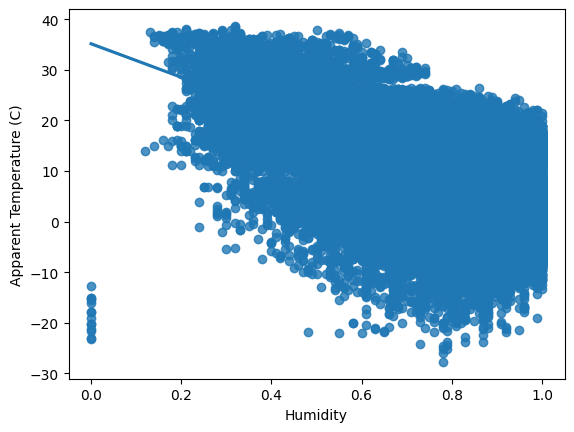

In [58]:
sns.scatterplot()
sns.regplot(x=X_train, y=y_train)

Выведем диаграмму рассеяния для предсказаний

<Axes: xlabel='Humidity'>

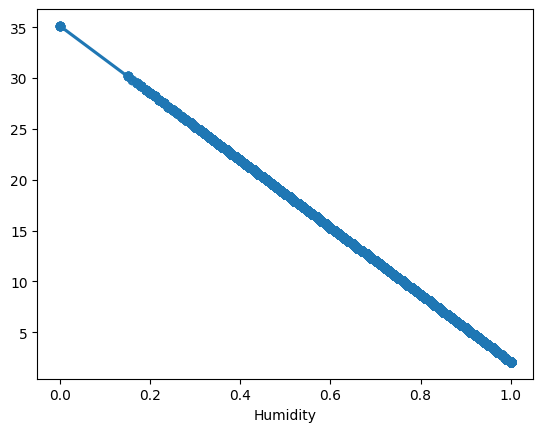

In [59]:
sns.scatterplot()
sns.regplot(x=X_test, y=temp_predict)

In [60]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(weather[['Humidity', 'Wind Speed (km/h)']], weather['Apparent Temperature (C)'], test_size=0.33, random_state=54)


In [61]:
X_train

,Humidity,Wind Speed (km/h)
8679,0.47,25.9049
95808,0.87,3.1878
57386,0.72,6.4239
32537,0.41,14.4900
40926,0.83,7.9051
...,...,...
93921,0.81,9.4346
5143,0.90,11.6403
61199,0.83,6.1019
82818,0.55,9.5634


In [62]:
y_train

8679     26.111111
95808    16.138889
57386    17.066667
32537    23.888889
40926    13.733333
           ...    
93921    16.227778
5143      0.966667
61199    19.550000
82818    22.266667
72815     1.677778
Name: Apparent Temperature (C), Length: 64623, dtype: float64

<Axes: xlabel='Humidity', ylabel='Apparent Temperature (C)'>

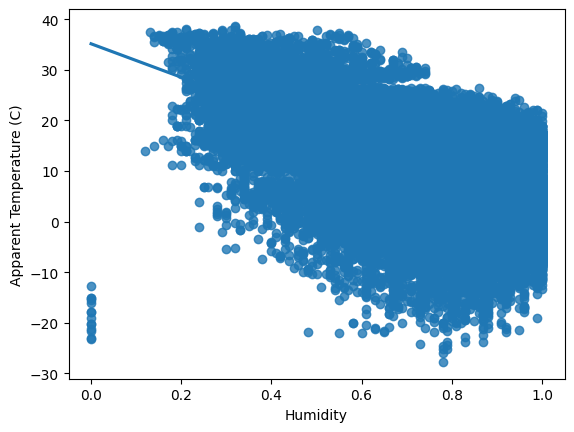

In [63]:
sns.scatterplot()
sns.regplot(x=X_train['Humidity'], y=y_train)

<Axes: xlabel='Wind Speed (km/h)', ylabel='Apparent Temperature (C)'>

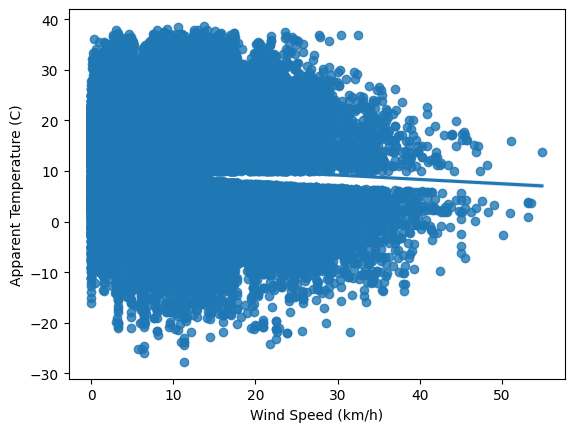

In [64]:
sns.scatterplot()
sns.regplot(x=X_train['Wind Speed (km/h)'], y=y_train)

In [65]:
lg.fit(X_train, y_train.to_frame())
temp_predict = lg.predict(X_test)

<Axes: xlabel='Humidity'>

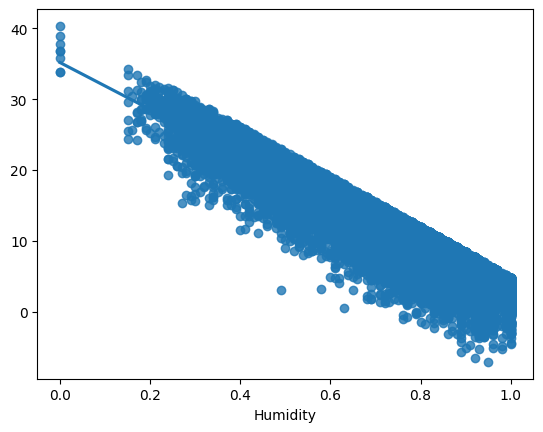

In [66]:
sns.scatterplot()
sns.regplot(x=X_test['Humidity'], y=temp_predict)

<Axes: xlabel='Wind Speed (km/h)'>

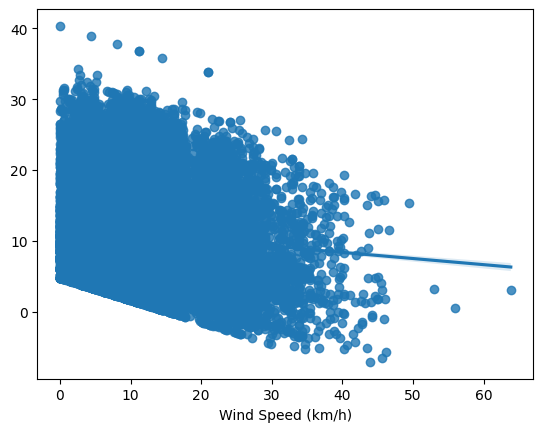

In [67]:
sns.scatterplot()
sns.regplot(x=X_test['Wind Speed (km/h)'], y=temp_predict)

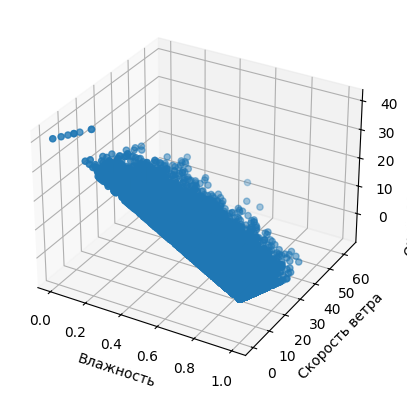

In [72]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = X_test['Humidity']
y = X_test['Wind Speed (km/h)']
z = temp_predict

ax.scatter(x, y, z)
ax.set_xlabel("Влажность")
ax.set_ylabel("Скорость ветра")
ax.set_zlabel("Ощущаемая температура")

plt.show()

